## Imports

In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
df = pd.read_csv('combined_df.csv')

In [105]:
df_relevant = df[['Type', 'Genres', 'Category', 'Content Rating', 'Normal_Rating_Count', 'Normal_Rating','Normal_Reviews', 'Normal_Size', 'Normal_Installs', 'Normal_Price', 'Normal_Revenue', 'Normal_popularity']]

## Label Encoding for ordinal categorical data

In [106]:
label_encoder = LabelEncoder()
df_relevant['Content Rating'] = label_encoder.fit_transform(df_relevant['Content Rating'])
df_relevant['Genres'] = label_encoder.fit_transform(df_relevant['Genres'])
df_relevant['Category'] = label_encoder.fit_transform(df_relevant['Category'])

C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\3702870009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Content Rating'] = label_encoder.fit_transform(df_relevant['Content Rating'])
C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\3702870009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Genres'] = label_encoder.fit_transform(df_relevant['Genres'])
C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\3702870009.py:4: SettingWithCopyWarning: 
A value is trying to be set 

## One-Hot Encoding for nominal categorical data

In [101]:
# # Example using pandas get_dummies for nominal data
# df_relevant = pd.get_dummies(df_relevant, columns=['Genres', 'Category'], drop_first=False)
# for col in df_relevant.columns:
#     if 'Genres' in col or 'Category' in col:
#         df_relevant[col] = df_relevant[col].astype(int)

KeyError: "None of [Index(['Genres', 'Category'], dtype='object')] are in the [columns]"

## Feature selection

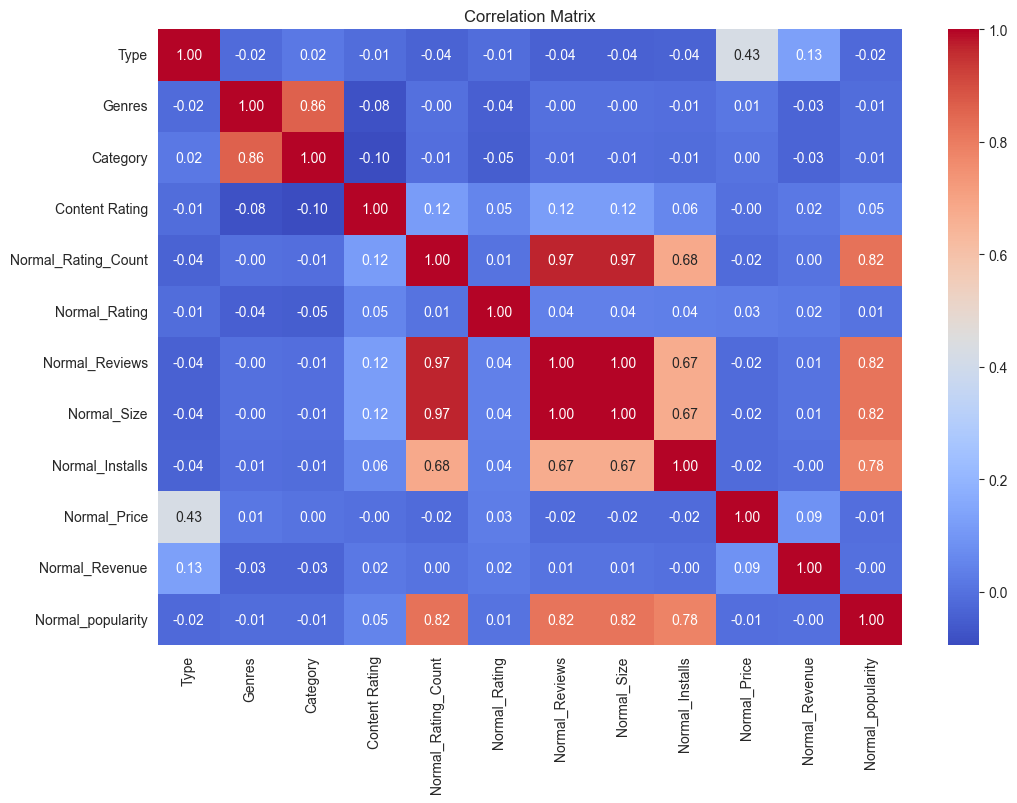

Relevant features based on correlation: ['Normal_Rating']


In [107]:
# Compute the correlation matrix
correlation_matrix = df_relevant.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('heatmap.png')
plt.close()


# Select features that have a high correlation with Normal_Rating
correlation_threshold = 0.1  # You can adjust this threshold
relevant_features = correlation_matrix.index[abs(correlation_matrix['Normal_Rating']) > correlation_threshold].tolist()

print("Relevant features based on correlation:", relevant_features)

## Split data

In [58]:
features = df_relevant.drop(columns=['Normal_Rating'])
targets = df_relevant['Normal_Rating']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

## Training the model

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


KeyboardInterrupt: 

## Evaluate the model

In [ ]:
# Predictions
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_test, preds):
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return mae, mse, r2

lr_mae, lr_mse, lr_r2 = evaluate_model(y_test, lr_preds)
dt_mae, dt_mse, dt_r2 = evaluate_model(y_test, dt_preds)
rf_mae, rf_mse, rf_r2 = evaluate_model(y_test, rf_preds)

# Print the evaluation metrics
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R2: {lr_r2}")
print(f"Decision Tree - MAE: {dt_mae}, MSE: {dt_mse}, R2: {dt_r2}")
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, R2: {rf_r2}")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Random Forest
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
best_rf_preds = best_rf_model.predict(X_test)
best_rf_mae, best_rf_mse, best_rf_r2 = evaluate_model(y_test, best_rf_preds)

print(f"Best Random Forest - MAE: {best_rf_mae}, MSE: {best_rf_mse}, R2: {best_rf_r2}")
print(f"Best Parameters: {best_params}")
